<h1 style="font-size:3rem;color:#A3623B;">Lab 1</h1>

<h2> Generation and visualization of data</h2>

<h3> 1.1. Synthetic data</h3>

In [4]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [113]:
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    
    #mu1, sigma1 = [2, 2], [[5, 1], [1, 5]] #These parameters are default(i.e they are given at the beginning of the lab)
    #mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]] #These parameters are defaulti.e they are given at the beginning of the lab)
    

    
    #a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.
    n_samples1 = 50 
    n_samples2 = 50
    mu1, sigma1 = [12, 12], [[5, 1], [1, 5]]
    mu2, sigma2 = [-1,-1], [[10, 1], [1, 3]]
    
    
    #b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.
    #n_samples1 = 50
    #n_samples2 = 50
    #mu1, sigma1 = [2, 2], [[10, 1], [1, 3]]
    #mu2, sigma2 = [-1,-1], [[10, 1], [1, 3]]


    #c)n=100, 40% of objects in Class -1, 60% in Class +1, linearly separable.
    #n_samples1 = 60
    #n_samples2 = 40
    #mu1, sigma1 = [12, 12], [[4, 2], [2, 3]]
    #mu2, sigma2 = [-1,-1], [[6, 1], [1, 5]]


    #d)n=100, 40% of objects in Class -1, 60% in Class +1, non-linearly separable.
    #n_samples1 = 60
    #n_samples2 = 40
    #mu1, sigma1 = [3, 3], [[10, 1], [1, 3]]
    #mu2, sigma2 = [2,4], [[8, 2], [2, 4]]
    
    
    nv1, X1, y1= gen_gaussian(int(n_samples1), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples2), mu2, sigma2, 0) # negative class

   
    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    print("X->",X.shape)
    print(X[0])
    print("y->",y.shape)
    print(y[0])


    # shuffle the data
    perm = list(range(0,100))
    print("perm=",perm)
    shuffle(perm)
    
    
    
    X = X[perm]
    y = y[perm]

    return X,y

In [114]:
X_syn, y_syn = generate_synthetic_data() 

X-> (100, 2)
[7.68961177 8.6299222 ]
y-> (100,)
1
perm= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [71]:
print(X_syn.shape)
print(y_syn.shape)

(200, 2)
(200,)


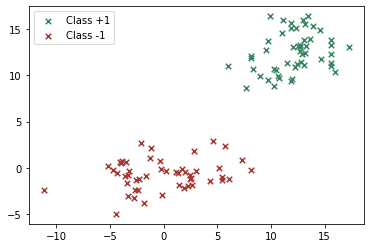

In [115]:
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

### Question:
1-Is the data linearly separable?

2-Play with parameters and plot the following cases:
    
    a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.
    b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.
    c)n=100, 40% of objects in Class -1, 60% in Class +1, linearly separable.
    d)n=100, 40% of objects in Class -1, 60% in Class +1, non-linearly separable.
    
    

### Your answer:
1- No it is not linearly separable. We can understand this from the plot.


2-Corresponding codes are above in the code


a)n=100, 50% of objects in Class -1, 50% in Class +1, linearly separable.


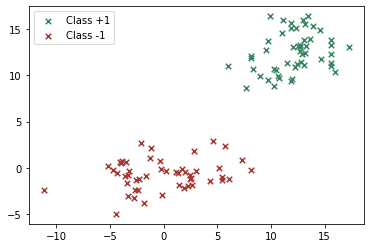


b)n=100, 50% of objects in Class -1, 50% in Class +1, non-linearly separable.

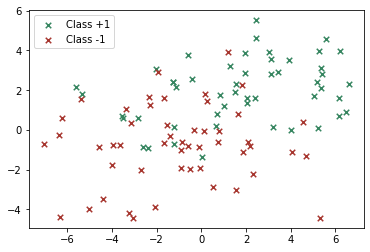

c)n=100, 40% of objects in Class -1, 60% in Class +1, linearly separable.


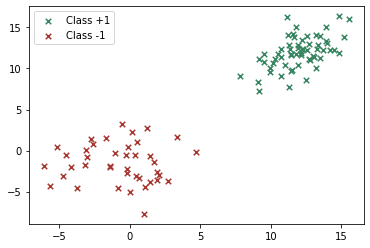


d)n=100, 40% of objects in Class -1, 60% in Class +1, non-linearly separable.

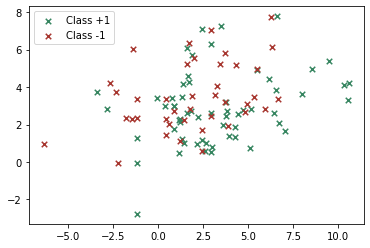


<h3> 1.2. Real data: Iris dataset</h3>

In [116]:
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes
#print(iris)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The iris dataset has $n=150$ objects in dimension $d=4$ with 3 classes. We will create a dataset in $d=2$ with only 2 classes.

In [122]:
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes

X = iris["data"][:, (2, 3)]  # petal length, petal width
print(X.shape)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.shape)


(150, 2)
(100,)


Now let's visualize the data:

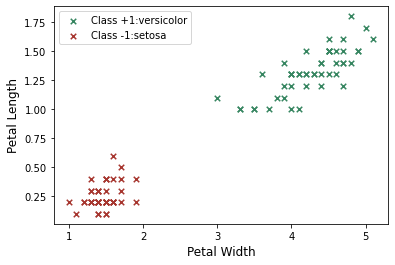

In [123]:
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Petal Width", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)

plt.show()

In [124]:
#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

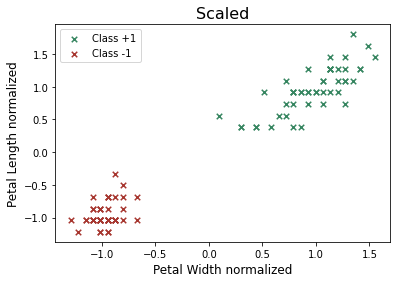

In [125]:
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

### Question:

Plot different examples by changing:

    a) The selected features.
    b) The selected classes.
    c) The selected features and classes.
    d) All the above normalized.

Pay attention to legend and axis labels, so that they reflect your choices. Include a brief explanation.

### Your answer:

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2)
(100,)


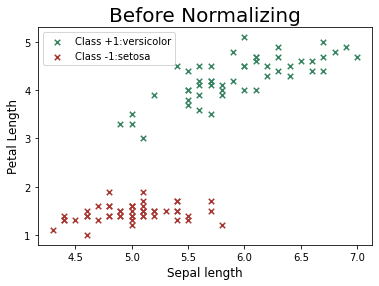

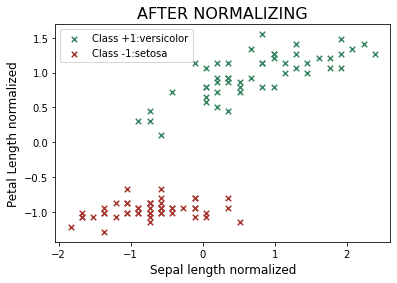

In [138]:
'''
1- a) The selected features.

I choose sepal-length and sepal-width as features. And didn't change the classes.
I also plot the normalized version here (not in a different cell)
'''
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes

X = iris["data"][:, (0, 2)]  # sepal length (cm), petal length (cm)
print(X.shape)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.shape)

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal length", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)
plt.legend(loc=2, fontsize=10)
plt.title("Before Normalizing",fontsize=20)
plt.show()

### NORMALIZE ###

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("Sepal length normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("AFTER NORMALIZING", fontsize=16)
plt.legend(loc=2, fontsize=10)

plt.show()

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2)
(100,)


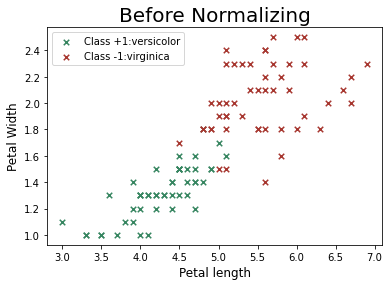

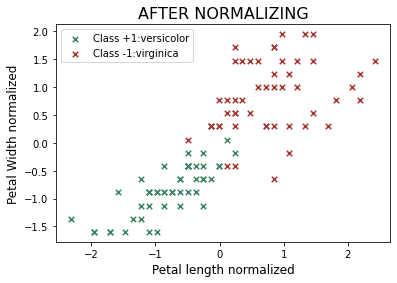

In [139]:
'''
1- b) The selected classes.

I choose VERSICOLOR and VIRGINICA as classes. And didn't change the features
I also plot the normalized version here (not in a different cell)

'''
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes

X = iris["data"][:, (2, 3)]  # petal length, petal width
print(X.shape)

y = iris["target"]


versicolor_or_virginica = (y == 1) | (y == 2)
X = X[versicolor_or_virginica]
y = y[versicolor_or_virginica]
print(y.shape)

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:virginica")

plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal Width", fontsize=12)
plt.legend(loc=2, fontsize=10)
plt.title("Before Normalizing",fontsize=20)
plt.show()


### NORMALIZE ###

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X_scaled[y==2][:, 0], X_scaled[y==2][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:virginica")

plt.xlabel("Petal length normalized", fontsize=12)
plt.ylabel("Petal Width normalized", fontsize=12)
plt.title("AFTER NORMALIZING", fontsize=16)
plt.legend(loc=2, fontsize=10)
plt.show()

(150, 4)
features =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
classes =  ['setosa' 'versicolor' 'virginica']
(150, 2)
(100,)


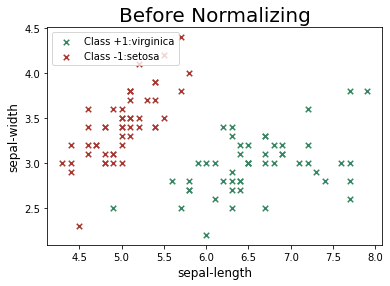

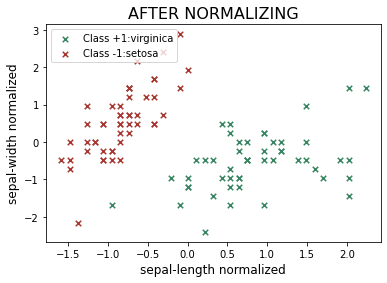

In [140]:
'''
 c) The selected features and classes.

I choose sepal-length and sepal-width as features. And setosa and virginica as classes.
I also plot the normalized version here (not in a different cell)

'''
print(iris.data.shape)
print("features = ",iris.feature_names) #variables, features
print("classes = ",iris.target_names) #classes

X = iris["data"][:, (0, 1)]  # 'sepal length (cm)' AND 'sepal width (cm)'
print(X.shape)
y = iris["target"]

setosa_or_virginica = (y==0) | (y==2)
X = X[setosa_or_virginica]
y = y[setosa_or_virginica]
print(y.shape)

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("sepal-length", fontsize=12)
plt.ylabel("sepal-width", fontsize=12)
plt.legend(loc=2, fontsize=10)
plt.title("Before Normalizing",fontsize=20)
plt.show()

### NORMALIZE ###

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[y==2][:, 0], X_scaled[y==2][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1:virginica")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.xlabel("sepal-length normalized", fontsize=12)
plt.ylabel("sepal-width normalized", fontsize=12)
plt.title("AFTER NORMALIZING", fontsize=16)
plt.legend(loc=2, fontsize=10)
plt.show()

In [ ]:
#d)
###########################################################################
#NORMALIZED PLOTTINGS
###########################################################################
# The normalized plottings are in above in questions a,b,c.